# [Churn Predition Project](https://www.youtube.com/watch?v=0Zw04wdeTQo&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=29)

We got a bunch of clients that might not be happy with the services we are providing. We want to identify clients who will stop using our services. 

We are going to score the likelihood of each customer churning. As the score goes higher, we are going to send out a promotional email, encouraging them to continue using the company information.

We'll use logistic regression to predict churn

## Binary Classification

y, the likelihood, is from 0 to 1 (0 - no churn and 1 - churn)

x, can include variables such as where they live, how much the customer pays, kind of services and contract they have. 

We are going to look at the existing customers, and see where this leads.

[Data to be used](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv)

Flow of the chapter:
- Download the data
- Set up the validation framework
- EDA
- Feature importance
- Churn rate and risk ratio
- Mutual information
- One-hot encoding
- Logistic Regression
- Model interpretation
- Using the model
- Summary

## [Data Preparation](https://www.youtube.com/watch?v=VSGGU9gYvdg&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=30)
- Read the data with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# gives a look at all of the columns of the dataset
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# Let's clean the dataframe first by cleaning the columns and rows

df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
# change the variables to be more useful for the model
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [9]:
df.totalcharges = df.totalcharges.fillna(0)

In [10]:
df.churn = (df.churn == 'yes').astype(int)

## [Setting up the validation framework](https://www.youtube.com/watch?v=_lwz34sOnSE&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=31)
- Perform the train/validation/test split with Scikit-Learn

In [11]:
# Split into train and test chunks
from sklearn.model_selection import train_test_split

In [12]:
#train_test_split?

In [13]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [14]:
# we need to split the full train into train and test
# wait, why was it 25%?
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [15]:
# Drop the indecies
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [16]:
# y variables
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [17]:
# delete the target variable
del df_train['churn']
del df_val['churn']
del df_test['churn']

## [EDA](https://www.youtube.com/watch?v=BNF1wjBwTQA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=32)

- Check missing values
- Look at the target variables (churn)
- Look at numerical and categorical variables

In [18]:
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
# missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
# look at the churn rate
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [21]:
# look at the churn rate
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [22]:
# gives the same value as value_counts
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

The reason why the mean works to calculate the churn rate is because we just use the sum of ones over the total sample number

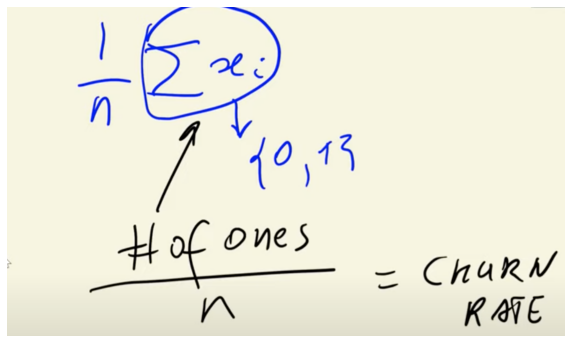

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display
img = Image.open('mean.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

Let's look at categorical and numerical variables

In [24]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

Numerical variables:
- tenure
- monthlycharges
- totalcharges

In [25]:
numerical = ['tenure','monthlycharges','totalcharges']

In [26]:
list(df_full_train.columns)

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [27]:
categorical = [
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [28]:
# number of unique values for each categorical variable
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## [Feature Importance: Churn Rate and Risk Ratio](https://www.youtube.com/watch?v=fzdzPLlvs40&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=33)
Feature importance analsis (part of EDA) - identify whch features affect our target variable
- Churn rate
- Risk ratio
- Mutual information

### Churn Rate

In [29]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [30]:
# Let's look at churn rate by gender
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

In [31]:
churn_female

0.27682403433476394

In [32]:
churn_male

0.2632135306553911

In [33]:
# no significant difference
global_churn = df_full_train.churn.mean(); global_churn

0.26996805111821087

In [34]:
# Partner - customers who live with a partner vs no partner
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()

In [35]:
# 5% more than the global churn
churn_no_partner

0.3298090040927694

In [36]:
# 5% less than the global churn
churn_partner

0.20503330866025166

**First way** of looking at the **feature importance** is by measuring the **difference** in the churn values. 
- If the difference value is more than 0, less likely to churn
- If the difference value is less than 0, more likely to churn

In [37]:
global_churn - churn_female

-0.006855983216553063

In [38]:
global_churn - churn_male

0.006754520462819769

In [39]:
global_churn - churn_partner

0.06493474245795922

In [40]:
global_churn - churn_no_partner

-0.05984095297455855

From the look at the 2 categories, gender and partner, it seems that gender is not going to be a significant variable whereas partner is going to be a significant variable (difference is about 6%)

### Risk Ratio

**Second way** of looking at the **feature importance** is by measuring the **risk ratio** in the churn values, which is 
- **Risk = Group / Global**
- If the risk value is more than 1, less likely to churn
- If the risk value is less than 1, more likely to churn

In [41]:
# churn is 22% higher
churn_no_partner / global_churn

1.2216593879412643

In [42]:
# churn is 25% lower
churn_partner / global_churn

0.7594724924338315

#### Visualization of the Risk

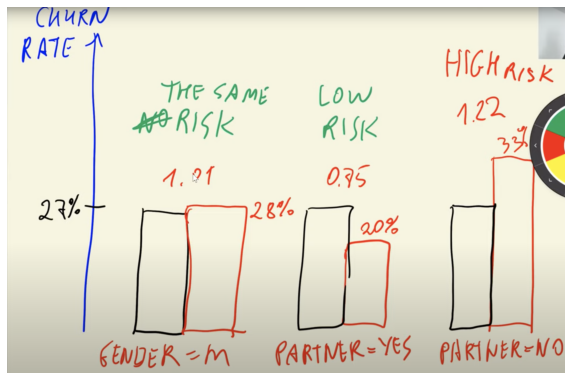

In [43]:
img2 = Image.open('churn_rate.png')
plt.figure(figsize=(10, 8))
plt.imshow(img2)
plt.axis('off')
plt.show()

Let's do this for all categorical variables in a more effieicnt way by translating the SQL query below to pandas syntax

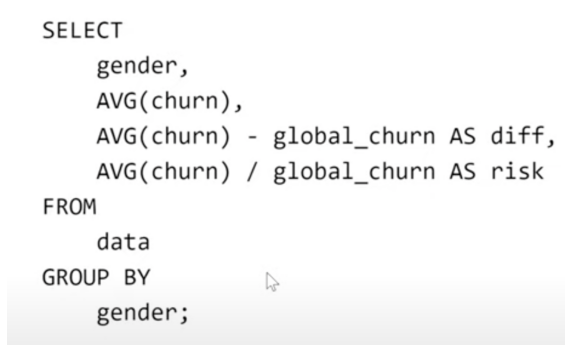

In [44]:
img3 = Image.open('SQL_query.png')
plt.figure(figsize=(10, 8))
plt.imshow(img3)
plt.axis('off')
plt.show()

In [45]:
from IPython.display import display

In [46]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


From the observation of the churn and risk values, it seems that havig a partner, having a contract, and having dependents are the 3 most impactful categorical variables

**However, is there any way to get a number that shows the importance of a specific categorical variable?**

## [Feature Importance: Mutual information](https://www.youtube.com/watch?v=_u2YaGT6RN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=34)

Mutual information - the concept from information theory, it tells us how much we can learn about one variable if we know the value of another. We can learn about the relative importance of the features

In [47]:
from sklearn.metrics import mutual_info_score

In [48]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [49]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [50]:
mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending = False)
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Up to device protection, everything seems to be import

## [Feature Importance: Correlation](https://www.youtube.com/watch?v=mz1707QVxiY&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=35)

How about numerical columns?
- Correlation cofficient (Pearson's coefficient)

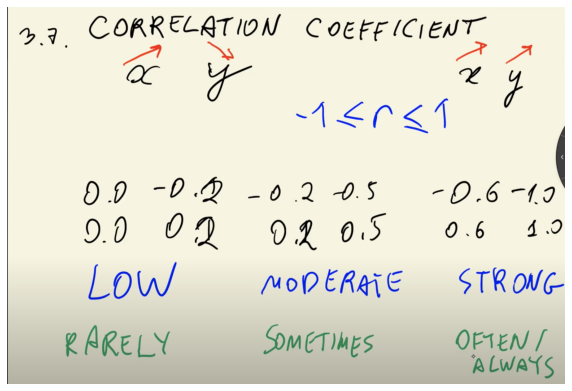

In [51]:
img4 = Image.open('correlation_coefficient.png')
plt.figure(figsize=(10, 8))
plt.imshow(img4)
plt.axis('off')
plt.show()

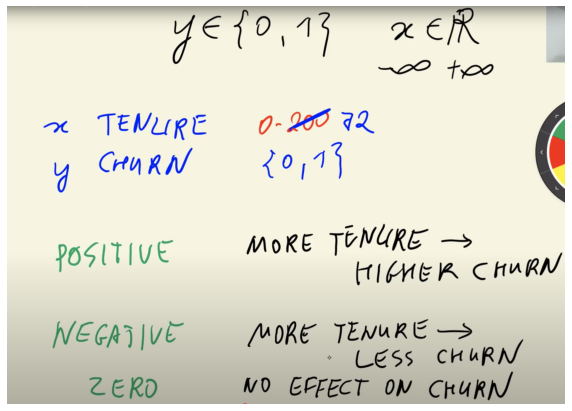

In [52]:
img5 = Image.open('correlation_coefficient_interpretation.png')
plt.figure(figsize=(10, 8))
plt.imshow(img5)
plt.axis('off')
plt.show()

In [53]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

When tenure increases, the less likely they are to churn. Same with total charges - the more people stay with the companym the more they pay, so the less likely they to churn. However, the increase in the monthly charges increases the churn.

#### Tenure

In [54]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [55]:
df_full_train[(df_full_train.tenure >2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [56]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

#### Monthly Charges

In [57]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [58]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <=50)].churn.mean()

0.18340943683409436

In [59]:
df_full_train[df_full_train.monthlycharges >50].churn.mean()

0.32499341585462205

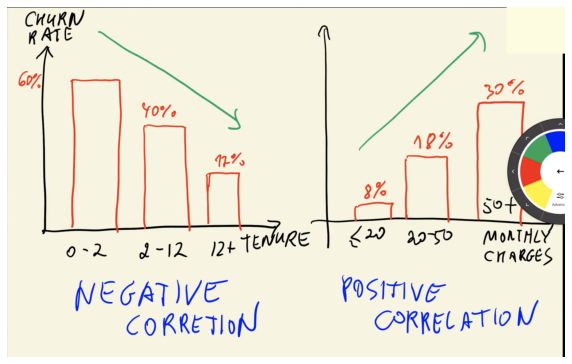

In [60]:
img6 = Image.open('churn_rate_correlation.png')
plt.figure(figsize=(10, 8))
plt.imshow(img6)
plt.axis('off')
plt.show()

We can also ignore the direction of the numerical variables and get the overall picture of the numerical feature importance

In [61]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## [One-hot encoding](https://www.youtube.com/watch?v=L-mjQFN5aR0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=36)
- Use Scikit-Learn to encode categorical variables

Let's say we have 2 categories - gender and contract. We ar going to use One-hot encoding to transform our categotical variables to a numerical format. Hot = activated value (gets a value of 1). Illustration of the one-hot encoding:

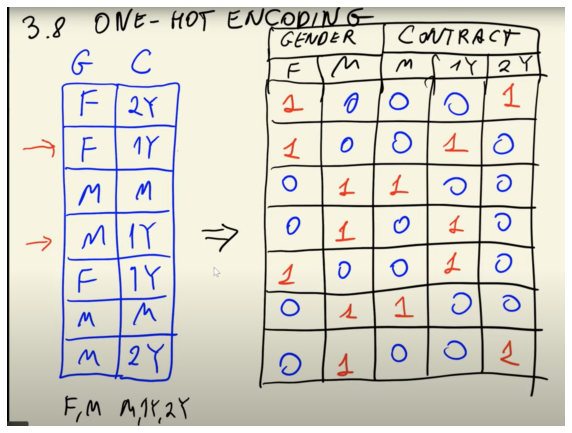

In [62]:
img7 = Image.open('one_hot_encoding.png')
plt.figure(figsize=(10, 8))
plt.imshow(img7)
plt.axis('off')
plt.show()

In [117]:
from sklearn.feature_extraction import DictVectorizer

### Training data

In [118]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [119]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [120]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [121]:
dv = DictVectorizer(sparse=False)

In [122]:
#Same as:
#dv.fit(train_dicts)
#X_train = dv.transform(train_dicts)
X_train = dv.fit_transform(train_dicts)

In [123]:
X_train.shape

(4225, 45)

In [124]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

### Validation data

In [125]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [126]:
# we only transform validation, so we don't fit on it. Fit in this case identifies all of the unique categories and trandform does the binary classification of each category
X_val = dv.transform(val_dicts)

## [Logistic regression]()
- Binary classification
- Linear vs logistic regression

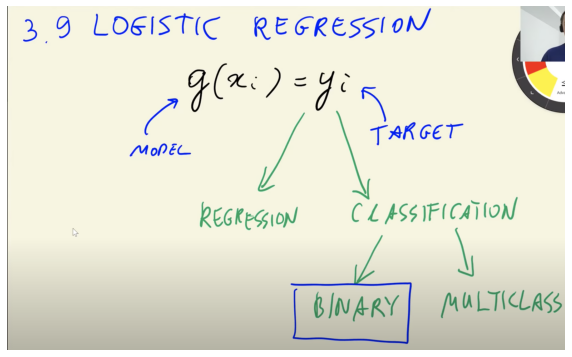

In [127]:
img8 = Image.open('regression_types.png')
plt.figure(figsize=(10, 8))
plt.imshow(img8)
plt.axis('off')
plt.show()

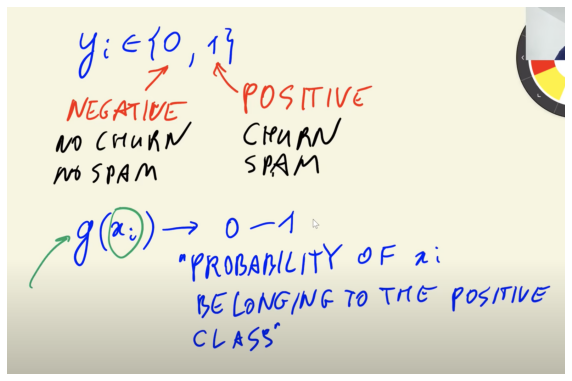

In [138]:
img9 = Image.open('binary_logistic_regression.png')
plt.figure(figsize=(10, 8))
plt.imshow(img9)
plt.axis('off')
plt.show()

But how is logistic regression implemented?
- We have the biased term
- We also have weights vector(similar to linear regression)
- The use of the dot product
- The only difference is that we need to put the results into the **sigmoid curve** (to get the likelihoods of a row belonfing to a particular class), which makes the **target values be in the range from 0 to 1** instead of from negative infinity to positive infinity
- The linear function is a **score** and place the **score inside the sigmoid** produces the **probability**

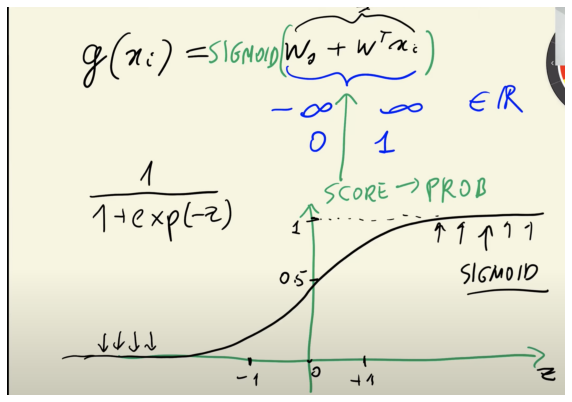

In [139]:
img10 = Image.open('comparison_linear_logistic_target_values.png')
plt.figure(figsize=(10, 8))
plt.imshow(img10)
plt.axis('off')
plt.show()

Both logistic regression and linear regression are linear models because we use the dot products.

In [131]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Example 1

In [133]:
z = np.linspace(-5, 5, 51)

In [134]:
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [135]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

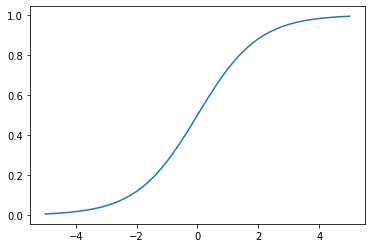

In [136]:
plt.plot(z,sigmoid(z))

### Example 2

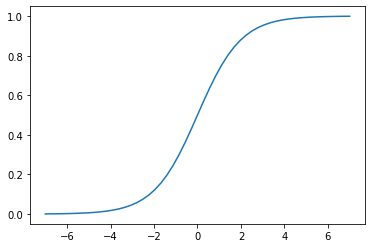

In [137]:
z = np.linspace(-7, 7, 51)
plt.plot(z,sigmoid(z))

### Linear Regression

In [141]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] + w[j]
    
    return result

### Logistic Regression

In [142]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [145]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

## [Training Logistic Regression with Scikit-Learn](https://www.youtube.com/watch?v=hae_jXe2fN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=38)
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [149]:
# individual weights
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [151]:
# the log odds of the response variable occurring when all predictor variables are equal to zero.
model.intercept_[0]

-0.10903511000402528

In [155]:
# hard predictions - 0's and 1-'s - of churn vs no churn
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [156]:
# soft predictions (probabilities) - each column gives a 0 probability and 1 probability
model.predict_proba(X_train)

array([[0.90452155, 0.09547845],
       [0.32067555, 0.67932445],
       [0.36632487, 0.63367513],
       ...,
       [0.4683766 , 0.5316234 ],
       [0.95745663, 0.04254337],
       [0.30127547, 0.69872453]])

In [158]:
# we can use these values to determine a churn threshold
y_pred = model.predict_proba(X_val)[:, 1]

In [160]:
churn_decision = (y_pred >= 0.5)

In [163]:
# These are all of the customers who will receive a promotional email to prevnt churning
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

### Accuracy

In [165]:
(y_val == churn_decision).mean()

0.8034066713981547

Taking a closer look to understand how accuracy works

In [169]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [170]:
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204520,0,0,True
2,0.212218,0,0,True
3,0.543044,1,1,True
4,0.213781,0,0,True
...,...,...,...,...
1404,0.313679,0,0,True
1405,0.039360,0,1,False
1406,0.136392,0,0,True
1407,0.799766,1,1,True


In [171]:
df_pred.correct.mean()

0.8034066713981547

## [Model interpretation](https://www.youtube.com/watch?v=OUrlxnUAAEA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=39)
- Look at the coefficients
- Train a smaller model with fewer features

In [174]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [172]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

Let's combine model.coef_[0].round(3) and dv.get_feature_names_out() to get the weight of the feature

In [177]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

We can train a smaller model, taking a subset of features

In [178]:
small = ['contract', 'tenure', 'monthlycharges']

In [181]:
# what we cab use for the vectorizer
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [182]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [183]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [186]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [189]:
X_train_small = dv_small.transform(dicts_train_small)

In [190]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [192]:
# biased term
w0 = model_small.intercept_[0]; w0

-2.476775664719812

In [193]:
# w vectors - our coefficients
w = model_small.coef_[0]; w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [194]:
# join names of the variables and their weights
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Let's assume we have a customer with a month-to-month contact who pays $50 per month and who has been a customer for 5 months so far. This is how to the model looks like

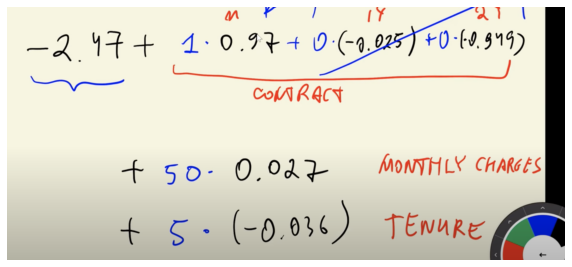

In [195]:
img11 = Image.open('logistic_regression_example.png')
plt.figure(figsize=(10, 8))
plt.imshow(img11)
plt.axis('off')
plt.show()

In [198]:
score = -2.47 + 0.97 + 50*0.027 + 5 * -0.036

In [199]:
# churn of the example customer
sigmoid(score)

0.41824062315816374

## [Using the Model](https://www.youtube.com/watch?v=OUrlxnUAAEA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=39)

In [200]:
dicts_full_train = df_full_train[categorical +  numerical].to_dict(orient = 'records')

In [202]:
dv = DictVectorizer(sparse=False)

In [203]:
X_full_train = dv.fit_transform(dicts_full_train)

In [204]:
y_full_train = df_full_train.churn.values

In [207]:
model = LogisticRegression().fit(X_full_train, y_full_train)

In [209]:
# Test data

In [208]:
dicts_test = df_test[categorical +  numerical].to_dict(orient = 'records')

In [210]:
X_test = dv.transform(dicts_test)

In [211]:
y_pred = model.predict_proba(X_test)[:, 1]

In [212]:
churn_decision = (y_pred >= 0.5)

In [213]:
(churn_decision == y_test).mean()

0.815471965933286

Only 1% difference in the accuracy for the full train and test datasets, so this model should be ok to use

In [215]:
# Let's see if this customer will churn
customer = dicts_test[10]

In [217]:
X_customer = dv.transform([customer])

In [218]:
X_customer.shape

(1, 45)

In [220]:
# 40% of churning
model.predict_proba(X_customer)[0,1]

0.40568109777862005

In [221]:
# was not going to churn
y_test[10]

0

In [224]:
# Let's look at one more customer
customer = dicts_test[-1]

In [225]:
X_customer = dv.transform([customer])

In [229]:
# 60% of churning
model.predict_proba(X_customer)[0,1]

0.5968852088147096

In [228]:
y_test[-1]

1

## [Summary](https://www.youtube.com/watch?v=Zz6oRGsJkW4&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=41)
- Feature importance - risk, nutual information, correlation
- One-hot encoding can be implemented with `DictVectorizer`
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression